In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split

In [30]:
# Load the training and testing data
train_data = pd.read_csv('Train_data.csv')
test_data = pd.read_csv('Test_data.csv')

In [31]:
new_column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_error_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate','last_flag','attack']
train_data.columns = new_column_names
test_data.columns = new_column_names[:-1]  # test_data won't have 'attack' column


In [32]:
train_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [33]:
test_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [34]:
# One-hot encode categorical columns
categorical_cols = ['protocol_type', 'service', 'flag']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_train_cols = encoder.fit_transform(train_data[categorical_cols])
encoded_test_cols = encoder.transform(test_data[categorical_cols])

encoded_train_df = pd.DataFrame(encoded_train_cols, columns=encoder.get_feature_names_out(categorical_cols))
encoded_test_df = pd.DataFrame(encoded_test_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns
train_data.drop(categorical_cols, axis=1, inplace=True)
test_data.drop(categorical_cols, axis=1, inplace=True)

# Concatenate encoded columns
train_data = pd.concat([train_data, encoded_train_df], axis=1)
test_data = pd.concat([test_data, encoded_test_df], axis=1)

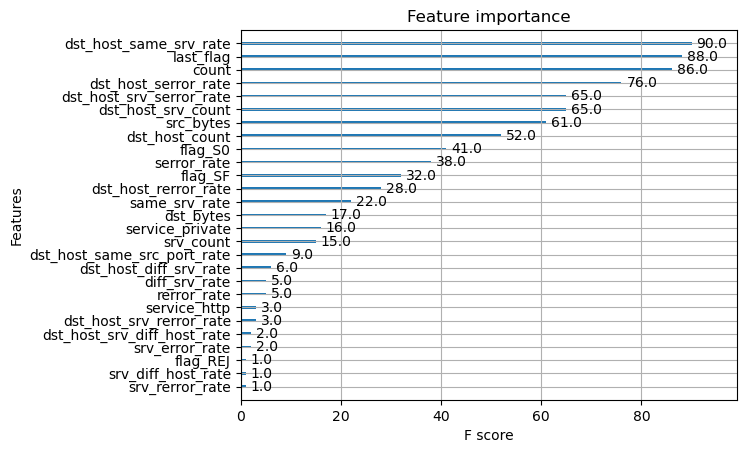

Cross-validation scores: [0.99994243 1.         0.99982728 0.99988485 1.        ]
Mean accuracy: 1.00%
Standard deviation: 0.00%


In [35]:
# Split training data into features and target
X_train = train_data.drop('attack', axis=1)
y_train = train_data['attack']

# Train the model
model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(test_data)

# Plot feature importance
plot_importance(model)
plt.show()

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.2f}%")
print(f"Standard deviation: {np.std(cv_scores):.2f}%")




In [36]:
# Save predictions to a CSV file
results = pd.DataFrame({'Predicted': y_pred})
results.to_csv('predicted_result_9.csv', index=False)

print(f"Predicted results saved to predicted_result_9.csv")

# Print the number of rows in test data and predictions
print(f"Number of rows in test data: {len(test_data)}")
print(f"Number of rows in predictions: {len(results)}")


Predicted results saved to predicted_result_9.csv
Number of rows in test data: 21712
Number of rows in predictions: 21712
